## Univariate Feature Selection

This works by selecting the best features based on the univariate statistical tests (ANOVA). The methods based on F-test estimate the degree of linear dependency between the two randdom variables. They assume a linear relationship between the feature and the target. These methods also assume that the variables follow a Gaussian Distribution.

In [1]:
# Import Dependenices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline

In [2]:
# Load Dataset
df = pd.read_csv('paribas_data.csv', nrows=50000)
df.shape

(50000, 133)

In [3]:
df.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [4]:
# Get Numerical features from dataset
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [5]:
data = df[numerical_features]

In [6]:
data.shape

(50000, 114)

In [7]:
data.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [8]:
X = data.drop(['ID','target'], axis=1)
X.shape

(50000, 112)

In [9]:
y = data['target']
y.shape

(50000,)

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35000, 112), (35000,), (15000, 112), (15000,))

### Univariate Feature Selection using Classification

In [11]:
# Calculate Univariate Statistical measure between each variable and target
univariate = f_classif(X_train.fillna(0), y_train)
univariate

(array([1.64440165e+01, 6.96135292e-01, 1.02775535e+00, 1.64798838e+01,
        7.24164984e+00, 7.19824647e+00, 6.96753215e+00, 2.21266972e+01,
        7.91055073e+02, 2.15996168e+01, 9.68286451e+01, 2.72680419e+01,
        6.49376361e+02, 2.87993951e+01, 1.85558772e+01, 1.04443875e-01,
        5.94389679e+00, 2.81635582e+01, 1.82098738e+01, 1.30468964e+02,
        3.19766963e+01, 4.69424491e+00, 5.45498821e+00, 6.62419644e+00,
        1.87314515e+01, 1.44440073e+01, 2.87981891e+01, 5.08710584e+01,
        3.32424348e+02, 2.28268790e+01, 4.00527605e+01, 2.69698579e+01,
        1.35443346e+02, 2.27256889e+00, 3.95451992e+01, 1.93110493e+01,
        2.02747267e+01, 5.71305522e+00, 7.57410116e+00, 3.36551955e+01,
        5.75060942e+00, 4.10510139e+01, 2.22985502e+01, 2.16058359e+03,
        5.30841003e+01, 2.18757381e+01, 2.39717504e+00, 5.17204370e+01,
        1.23012344e+01, 4.26712022e+01, 1.04402431e+01, 4.10888128e+00,
        1.02152054e+01, 3.09663982e+02, 6.47103902e+00, 1.013004

In [12]:
# Capture P values in a series
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

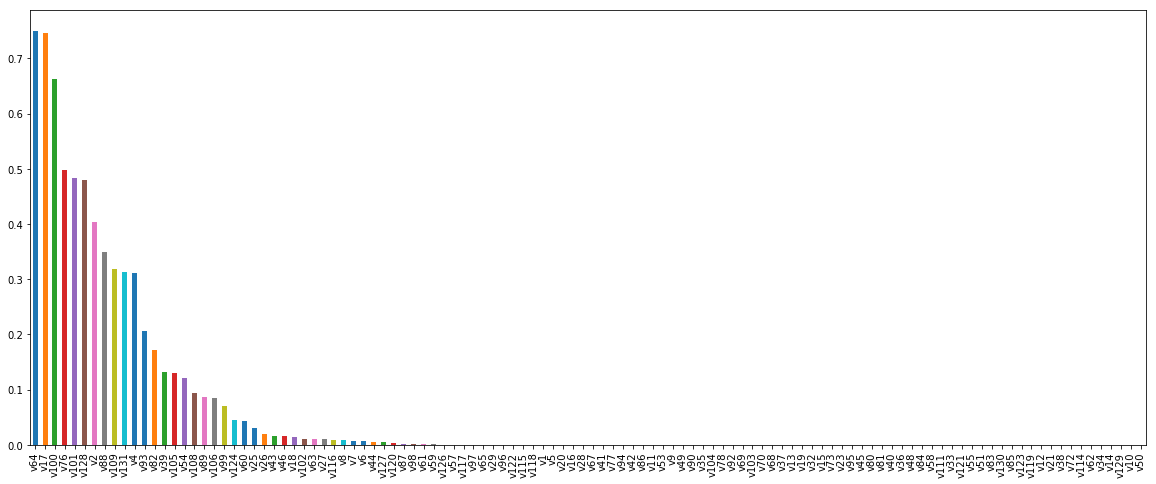

In [13]:
# Plot the P values
univariate.sort_values(ascending=False).plot.bar(figsize=(20,8))

Above bar plot shows the P-values from highest to lowest for each feature. If we use a cutoff of 0.05, then the values on the left are the features that don't have much predictive power and hence we can leave them.

In [15]:
# Select K best Features
k_best_features = SelectKBest(f_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[k_best_features.get_support()]

Index(['v10', 'v14', 'v21', 'v34', 'v38', 'v50', 'v62', 'v72', 'v114', 'v129'], dtype='object')

In [16]:
X_train = k_best_features.transform(X_train.fillna(0))
X_train.shape

(35000, 10)

### Univariate Feature Selection using Regression

In [17]:
# Load Dataset
df = pd.read_csv('house_price_data.csv')
df.shape

(1460, 81)

In [18]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
# Get Numerical features from dataset
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [20]:
data = df[numerical_features]

In [21]:
data.shape

(1460, 38)

In [22]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [23]:
X = data.drop(['SalePrice'], axis=1)
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [24]:
y = data['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [25]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1022, 37), (1022,), (438, 37), (438,))

In [26]:
# Calculate Univariate Statistical measure between each variable and target
univariate = f_regression(X_train.fillna(0), y_train)
univariate

(array([4.74305515e-01, 6.73407886e+00, 4.74276438e+01, 9.67158906e+01,
        1.80159175e+03, 1.37867743e+01, 4.39421294e+02, 3.56716834e+02,
        3.10405143e+02, 2.12143408e+02, 5.82697648e-01, 5.03880785e+01,
        7.64870238e+02, 6.72377419e+02, 1.08747625e+02, 2.35778207e+00,
        1.08314282e+03, 6.20909534e+01, 3.00244350e+00, 4.60858176e+02,
        9.31482403e+01, 2.38354652e+01, 1.84822761e+01, 4.03798731e+02,
        2.78511457e+02, 6.89139028e+01, 7.58036763e+02, 7.05352668e+02,
        1.01370469e+02, 1.57193120e+02, 1.62498209e+01, 2.41221202e+00,
        1.19257641e+01, 1.37824559e+01, 6.05562115e-01, 3.96641145e+00,
        2.53185447e+00]),
 array([4.91169681e-001, 9.59458321e-003, 9.96470625e-012, 7.23930417e-022,
        1.34514528e-227, 2.15860518e-004, 2.04712294e-081, 1.84042103e-068,
        7.35303539e-061, 8.44064717e-044, 4.45433383e-001, 2.36031481e-012,
        4.44298989e-126, 2.81732934e-114, 2.90681965e-024, 1.24969427e-001,
        1.83756492e-16

In [27]:
# Capture P values in a series
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

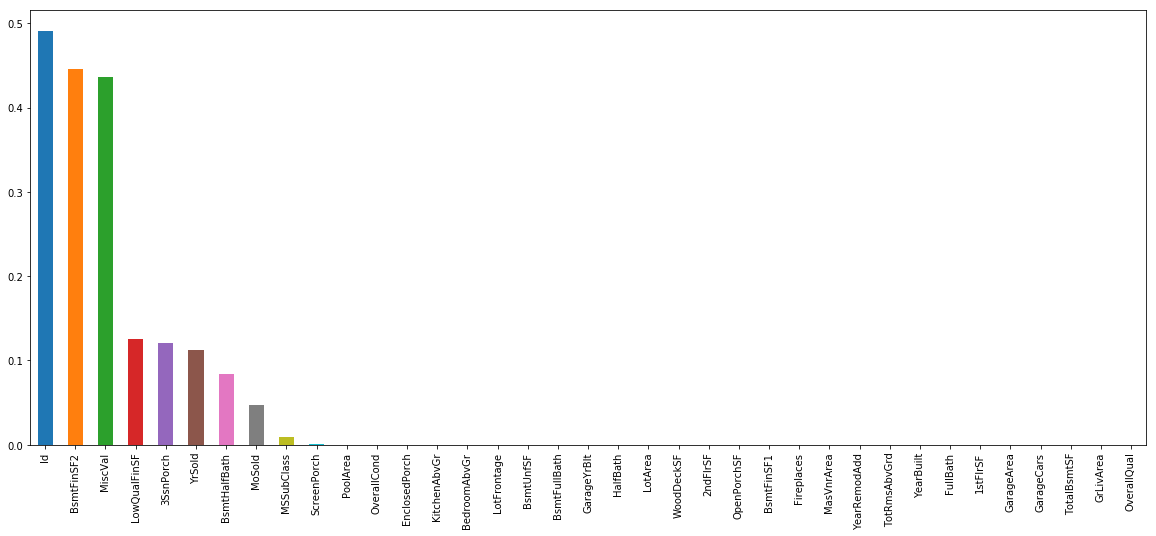

In [28]:
# Plot the P values
univariate.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [29]:
# Select K percentile Features
k_percentile_features = SelectPercentile(f_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[k_percentile_features.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')

In [30]:
X_train = k_percentile_features.transform(X_train.fillna(0))
X_train.shape

(1022, 4)